In [49]:
import os
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt

### Análisis inicial datasets DataLake
Cargamos los datos

In [50]:
# Ruta a los archivos (desde ETL)
folder_path = "../DataLake"
datasets = [f for f in os.listdir(folder_path) if f.endswith(".tsv")]

Filas por dataset.

In [60]:
def contar_filas_datasets(ruta_carpeta):
    """
    Cuenta y muestra el número de filas de cada archivo .tsv en una carpeta.

    Parámetros:
    - ruta_carpeta (str): Ruta donde se encuentran los archivos .tsv

    Retorna:
    - conteo_filas (dict): Diccionario con nombre de archivo como clave y número de filas como valor
    """

    archivos = [f for f in os.listdir(ruta_carpeta) if f.endswith(".tsv")]
    conteo_filas = {}

    for archivo in archivos:
        ruta_completa = os.path.join(ruta_carpeta, archivo)
        try:
            df = pd.read_csv(ruta_completa, sep="\t")
            n_filas = len(df)
            conteo_filas[archivo] = n_filas
            print(f"✅ {archivo}: {n_filas} filas")
        except Exception as e:
            print(f"❌ Error leyendo {archivo}: {e}")

    return conteo_filas

In [61]:
contar_filas_datasets(folder_path)

✅ TCGA-KIRC.clinical.tsv: 950 filas
✅ TCGA-LUAD.clinical.tsv: 721 filas
✅ TCGA-SKCM.clinical.tsv: 476 filas
✅ TCGA-LGG.clinical.tsv: 534 filas
✅ TCGA-PCPG.clinical.tsv: 187 filas
✅ TCGA-READ.clinical.tsv: 187 filas
✅ TCGA-LUSC.clinical.tsv: 630 filas
✅ TCGA-THCA.clinical.tsv: 580 filas
✅ TCGA-UCEC.clinical.tsv: 600 filas
✅ TCGA-CHOL.clinical.tsv: 60 filas
✅ TCGA-KICH.clinical.tsv: 105 filas
✅ TCGA-KIRP.clinical.tsv: 352 filas
✅ TCGA-PRAD.clinical.tsv: 572 filas
✅ TCGA-HNSC.clinical.tsv: 604 filas
✅ TCGA-BRCA.clinical.tsv: 1255 filas
✅ TCGA-TGCT.clinical.tsv: 269 filas
✅ TCGA-ESCA.clinical.tsv: 204 filas
✅ TCGA-DLBC.clinical.tsv: 48 filas
✅ TCGA-CESC.clinical.tsv: 312 filas
✅ TCGA-PAAD.clinical.tsv: 196 filas
✅ TCGA-MESO.clinical.tsv: 87 filas
✅ TCGA-LIHC.clinical.tsv: 439 filas
✅ TCGA-ACC.clinical.tsv: 92 filas
✅ TCGA-COAD.clinical.tsv: 562 filas
✅ TCGA-UCS.clinical.tsv: 57 filas
✅ TCGA-GBM.clinical.tsv: 636 filas
✅ TCGA-LAML.clinical.tsv: 278 filas
✅ TCGA-SARC.clinical.tsv: 272 filas


{'TCGA-KIRC.clinical.tsv': 950,
 'TCGA-LUAD.clinical.tsv': 721,
 'TCGA-SKCM.clinical.tsv': 476,
 'TCGA-LGG.clinical.tsv': 534,
 'TCGA-PCPG.clinical.tsv': 187,
 'TCGA-READ.clinical.tsv': 187,
 'TCGA-LUSC.clinical.tsv': 630,
 'TCGA-THCA.clinical.tsv': 580,
 'TCGA-UCEC.clinical.tsv': 600,
 'TCGA-CHOL.clinical.tsv': 60,
 'TCGA-KICH.clinical.tsv': 105,
 'TCGA-KIRP.clinical.tsv': 352,
 'TCGA-PRAD.clinical.tsv': 572,
 'TCGA-HNSC.clinical.tsv': 604,
 'TCGA-BRCA.clinical.tsv': 1255,
 'TCGA-TGCT.clinical.tsv': 269,
 'TCGA-ESCA.clinical.tsv': 204,
 'TCGA-DLBC.clinical.tsv': 48,
 'TCGA-CESC.clinical.tsv': 312,
 'TCGA-PAAD.clinical.tsv': 196,
 'TCGA-MESO.clinical.tsv': 87,
 'TCGA-LIHC.clinical.tsv': 439,
 'TCGA-ACC.clinical.tsv': 92,
 'TCGA-COAD.clinical.tsv': 562,
 'TCGA-UCS.clinical.tsv': 57,
 'TCGA-GBM.clinical.tsv': 636,
 'TCGA-LAML.clinical.tsv': 278,
 'TCGA-SARC.clinical.tsv': 272,
 'TCGA-BLCA.clinical.tsv': 439,
 'TCGA-STAD.clinical.tsv': 511,
 'TCGA-OV.clinical.tsv': 632,
 'TCGA-UVM.clinica

Imprimimos las varaibles totales, imprimimos las variables más frecuentes y faltantes.

In [51]:
def analizar_columnas_tsv(ruta_carpeta):
    """
    Analiza los archivos .tsv de una carpeta para determinar:
    - Columnas presentes por dataset
    - Columnas comunes
    - Columnas más frecuentes
    - Columnas faltantes por dataset

    Parámetros:
    ruta_carpeta (str): Ruta donde están los archivos .tsv

    Retorna:
    - columnas_por_dataset (dict)
    - columnas_totales (set)
    - frecuencia_df (DataFrame)
    - columnas_comunes (DataFrame)
    - faltantes_por_dataset (dict)
    """

    datasets = [f for f in os.listdir(ruta_carpeta) if f.endswith(".tsv")]

    columnas_por_dataset = {}
    columnas_totales = set()

    # Paso 1: recolectar columnas
    for file in datasets:
        dataset_name = file.replace(".tsv", "")
        path = os.path.join(ruta_carpeta, file)
        try:
            df = pd.read_csv(path, sep="\t", nrows=1)
            columnas = list(df.columns)
            columnas_por_dataset[dataset_name] = columnas
            columnas_totales.update(columnas)
        except Exception as e:
            print(f"❌ Error en {dataset_name}: {e}")

    # Paso 2: contar en cuántos datasets aparece cada columna
    columna_frecuencia = defaultdict(int)
    for columnas in columnas_por_dataset.values():
        for col in columnas:
            columna_frecuencia[col] += 1

    # DataFrame de frecuencia
    frecuencia_df = pd.DataFrame.from_dict(columna_frecuencia, orient="index", columns=["# datasets"])
    frecuencia_df = frecuencia_df.sort_values(by="# datasets", ascending=False)

    # Paso 3: columnas comunes a todos los datasets
    num_datasets = len(columnas_por_dataset)
    columnas_comunes = frecuencia_df[frecuencia_df["# datasets"] == num_datasets]

    # Paso 4: columnas faltantes por dataset
    faltantes_por_dataset = {}
    for dataset, columnas in columnas_por_dataset.items():
        faltantes = columnas_totales - set(columnas)
        faltantes_por_dataset[dataset] = faltantes

    # Resumen por pantalla
    print(f"🔍 Columnas totales distintas: {len(columnas_totales)}")
    print(f"✅ Columnas comunes a TODOS los datasets ({len(columnas_comunes)}):")
    print(columnas_comunes.index.tolist())

    print("\n📉 Top columnas más frecuentes:")
    display(frecuencia_df.head(10))

    print("\n📂 Ejemplo de columnas faltantes en un dataset:")
    for dataset, faltantes in list(faltantes_por_dataset.items())[:1]:
        print(f"\n🗂 {dataset} (faltan {len(faltantes)} columnas):")
        print(sorted(faltantes))

    return columnas_por_dataset, columnas_totales, frecuencia_df, columnas_comunes, faltantes_por_dataset

In [52]:
analizar_columnas_tsv(folder_path)

🔍 Columnas totales distintas: 103
✅ Columnas comunes a TODOS los datasets (58):
['sample', 'age_at_earliest_diagnosis_in_years.diagnoses.xena_derived', 'last_known_disease_status.diagnoses', 'tissue_or_organ_of_origin.diagnoses', 'days_to_last_follow_up.diagnoses', 'age_at_diagnosis.diagnoses', 'primary_diagnosis.diagnoses', 'id', 'year_of_diagnosis.diagnoses', 'prior_treatment.diagnoses', 'morphology.diagnoses', 'classification_of_tumor.diagnoses', 'site_of_resection_or_biopsy.diagnoses', 'tumor_grade.diagnoses', 'progression_or_recurrence.diagnoses', 'age_at_earliest_diagnosis.diagnoses.xena_derived', 'treatment_id.treatments.diagnoses', 'synchronous_malignancy.diagnoses', 'submitter_id.treatments.diagnoses', 'treatment_type.treatments.diagnoses', 'treatment_or_therapy.treatments.diagnoses', 'created_datetime.treatments.diagnoses', 'updated_datetime.treatments.diagnoses', 'state.treatments.diagnoses', 'sample_type_id.samples', 'tumor_descriptor.samples', 'sample_id.samples', 'sample_

,# datasets
sample,33
age_at_earliest_diagnosis_in_years.diagnoses.xena_derived,33
last_known_disease_status.diagnoses,33
tissue_or_organ_of_origin.diagnoses,33
days_to_last_follow_up.diagnoses,33
age_at_diagnosis.diagnoses,33
primary_diagnosis.diagnoses,33
id,33
year_of_diagnosis.diagnoses,33
prior_treatment.diagnoses,33



📂 Ejemplo de columnas faltantes en un dataset:

🗂 TCGA-KIRC.clinical (faltan 13 columnas):
['ajcc_clinical_n.diagnoses', 'ajcc_clinical_stage.diagnoses', 'ajcc_clinical_t.diagnoses', 'ann_arbor_b_symptoms.diagnoses', 'ann_arbor_clinical_stage.diagnoses', 'ann_arbor_extranodal_involvement.diagnoses', 'annotations.samples', 'days_to_sample_procurement.samples', 'figo_stage.diagnoses', 'igcccg_stage.diagnoses', 'masaoka_stage.diagnoses', 'primary_gleason_grade.diagnoses', 'secondary_gleason_grade.diagnoses']


({'TCGA-KIRC.clinical': ['sample',
   'id',
   'disease_type',
   'case_id',
   'submitter_id',
   'primary_site',
   'cigarettes_per_day.exposures',
   'alcohol_history.exposures',
   'years_smoked.exposures',
   'race.demographic',
   'gender.demographic',
   'ethnicity.demographic',
   'vital_status.demographic',
   'age_at_index.demographic',
   'days_to_birth.demographic',
   'year_of_birth.demographic',
   'year_of_death.demographic',
   'primary_site.project',
   'project_id.project',
   'disease_type.project',
   'name.project',
   'name.program.project',
   'tissue_source_site_id.tissue_source_site',
   'code.tissue_source_site',
   'name.tissue_source_site',
   'project.tissue_source_site',
   'bcr_id.tissue_source_site',
   'days_to_death.demographic',
   'pack_years_smoked.exposures',
   'entity_submitter_id.annotations',
   'notes.annotations',
   'submitter_id.annotations',
   'classification.annotations',
   'entity_id.annotations',
   'created_datetime.annotations',
   

Creamos tabla booleana para ver las variables faltantes en cada dataset.

In [53]:
# Crear DataFrame booleano
columnas_totales = sorted(columnas_totales)
boolean_df = pd.DataFrame(index=columnas_por_dataset.keys(), columns=columnas_totales)

for dataset, columnas in columnas_por_dataset.items():
    boolean_df.loc[dataset] = [1 if col in columnas else 0 for col in columnas_totales]

# Asegurar que los valores son enteros
boolean_df = boolean_df.astype(int)

# Guardar en la carpeta Utilidades
output_path = "../Utilidades/columnas_bool.csv"
os.makedirs("../Utilidades", exist_ok=True)
boolean_df.to_csv(output_path)

print(f"✅ Tabla booleana guardada en: {output_path}")

✅ Tabla booleana guardada en: ../Utilidades/columnas_bool.csv


In [54]:
def generar_tabla_booleana_columnas(columnas_por_dataset, ruta_salida):
    """
    Genera una tabla booleana (0/1) que indica qué columnas están presentes en cada dataset.

    Parámetros:
    - columnas_por_dataset (dict): Diccionario con nombres de datasets como claves y listas de columnas como valores.
    - ruta_salida (str): Ruta del archivo CSV donde se guardará la tabla booleana.

    Retorna:
    - boolean_df (DataFrame): DataFrame con 0s y 1s indicando presencia de columnas.
    """

    # Obtener todas las columnas posibles
    columnas_totales = sorted({col for cols in columnas_por_dataset.values() for col in cols})

    # Crear DataFrame booleano
    boolean_df = pd.DataFrame(index=columnas_por_dataset.keys(), columns=columnas_totales)

    for dataset, columnas in columnas_por_dataset.items():
        boolean_df.loc[dataset] = [1 if col in columnas else 0 for col in columnas_totales]

    # Convertir a enteros
    boolean_df = boolean_df.astype(int)

    # Guardar CSV
    os.makedirs(os.path.dirname(ruta_salida), exist_ok=True)
    boolean_df.to_csv(ruta_salida)

    print(f"✅ Tabla booleana guardada en: {ruta_salida}")
    return boolean_df

In [55]:
generar_tabla_booleana_columnas(columnas_por_dataset, "../Utilidades/columnas_bool.csv")

✅ Tabla booleana guardada en: ../Utilidades/columnas_bool.csv


,age_at_diagnosis.diagnoses,age_at_earliest_diagnosis.diagnoses.xena_derived,age_at_earliest_diagnosis_in_years.diagnoses.xena_derived,age_at_index.demographic,ajcc_clinical_m.diagnoses,ajcc_clinical_n.diagnoses,ajcc_clinical_stage.diagnoses,ajcc_clinical_t.diagnoses,ajcc_pathologic_m.diagnoses,ajcc_pathologic_n.diagnoses,ajcc_pathologic_stage.diagnoses,ajcc_pathologic_t.diagnoses,ajcc_staging_system_edition.diagnoses,alcohol_history.exposures,ann_arbor_b_symptoms.diagnoses,ann_arbor_clinical_stage.diagnoses,ann_arbor_extranodal_involvement.diagnoses,annotation_id.annotations,annotations.samples,bcr_id.tissue_source_site,case_id,case_id.annotations,case_submitter_id.annotations,category.annotations,cigarettes_per_day.exposures,classification.annotations,classification_of_tumor.diagnoses,code.tissue_source_site,composition.samples,created_datetime.annotations,created_datetime.treatments.diagnoses,days_to_birth.demographic,days_to_collection.samples,days_to_death.demographic,days_to_diagnosis.diagnoses,days_to_last_follow_up.diagnoses,days_to_sample_procurement.samples,disease_type,disease_type.project,entity_id.annotations,entity_submitter_id.annotations,entity_type.annotations,ethnicity.demographic,figo_stage.diagnoses,gender.demographic,icd_10_code.diagnoses,id,igcccg_stage.diagnoses,initial_weight.samples,intermediate_dimension.samples,is_ffpe.samples,last_known_disease_status.diagnoses,longest_dimension.samples,masaoka_stage.diagnoses,morphology.diagnoses,name.program.project,name.project,name.tissue_source_site,notes.annotations,oct_embedded.samples,pack_years_smoked.exposures,pathology_report_uuid.samples,preservation_method.samples,primary_diagnosis.diagnoses,primary_gleason_grade.diagnoses,primary_site,primary_site.project,prior_malignancy.diagnoses,prior_treatment.diagnoses,progression_or_recurrence.diagnoses,project.tissue_source_site,project_id.project,race.demographic,sample,sample_id.samples,sample_type.samples,sample_type_id.samples,secondary_gleason_grade.diagnoses,shortest_dimension.samples,site_of_resection_or_biopsy.diagnoses,specimen_type.samples,state.annotations,state.treatments.diagnoses,status.annotations,submitter_id,submitter_id.annotations,submitter_id.treatments.diagnoses,synchronous_malignancy.diagnoses,tissue_or_organ_of_origin.diagnoses,tissue_source_site_id.tissue_source_site,tissue_type.samples,treatment_id.treatments.diagnoses,treatment_or_therapy.treatments.diagnoses,treatment_type.treatments.diagnoses,tumor_descriptor.samples,tumor_grade.diagnoses,updated_datetime.annotations,updated_datetime.treatments.diagnoses,vital_status.demographic,year_of_birth.demographic,year_of_death.demographic,year_of_diagnosis.diagnoses,years_smoked.exposures
TCGA-KIRC.clinical.tsv,1,1,1,1,1,0,0,0,1,1,1,1,1,1,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
TCGA-LUAD.clinical.tsv,1,1,1,1,0,0,0,0,1,1,1,1,1,1,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
TCGA-SKCM.clinical.tsv,1,1,1,1,0,0,0,0,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,0,1,0,1,1,0,0,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
TCGA-LGG.clinical.tsv,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
TCGA-PCPG.clinical.tsv,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,0,1,0,1,1,0,0,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
TCGA-READ.clinical.tsv,1,1,1,1,0,0,0,0,1,1,1,1,1,1,0,0,0,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,0,1,1,

Creamos gráfica con los valores para verlo visualmente y la frecuencia de cada variable.

In [56]:
def visualizar_frecuencia_columnas(path_csv, titulo):
    """
    Carga un CSV con una tabla booleana (0/1) y muestra un gráfico de barras con la frecuencia de aparición
    de cada columna en los datasets.

    Parámetros:
    - path_csv (str): ruta al archivo CSV con la tabla booleana
    - titulo (str): título del gráfico (opcional)

    Retorna:
    - frecuencia_columnas (Series): número de datasets en que aparece cada columna
    """
    # Cargar CSV
    df = pd.read_csv(path_csv)

    # Sumar 1s por columna (número de datasets donde aparece cada variable)
    frecuencia_columnas = df.drop(columns=["Unnamed: 0"], errors="ignore").sum(axis=0).sort_values(ascending=False)

    # Mostrar mensaje
    print("📊 Frecuencia de todas las columnas en los datasets:")

    # Crear gráfico
    plt.figure(figsize=(15, 6))
    frecuencia_columnas.plot(kind='bar')

    # Títulos y ejes
    plt.title(titulo)
    plt.xlabel("Columnas")
    plt.ylabel("Número de datasets")
    plt.xticks(rotation=90)

    # Mostrar gráfico
    plt.tight_layout()
    plt.show()

    return frecuencia_columnas


📊 Frecuencia de todas las columnas en los datasets:


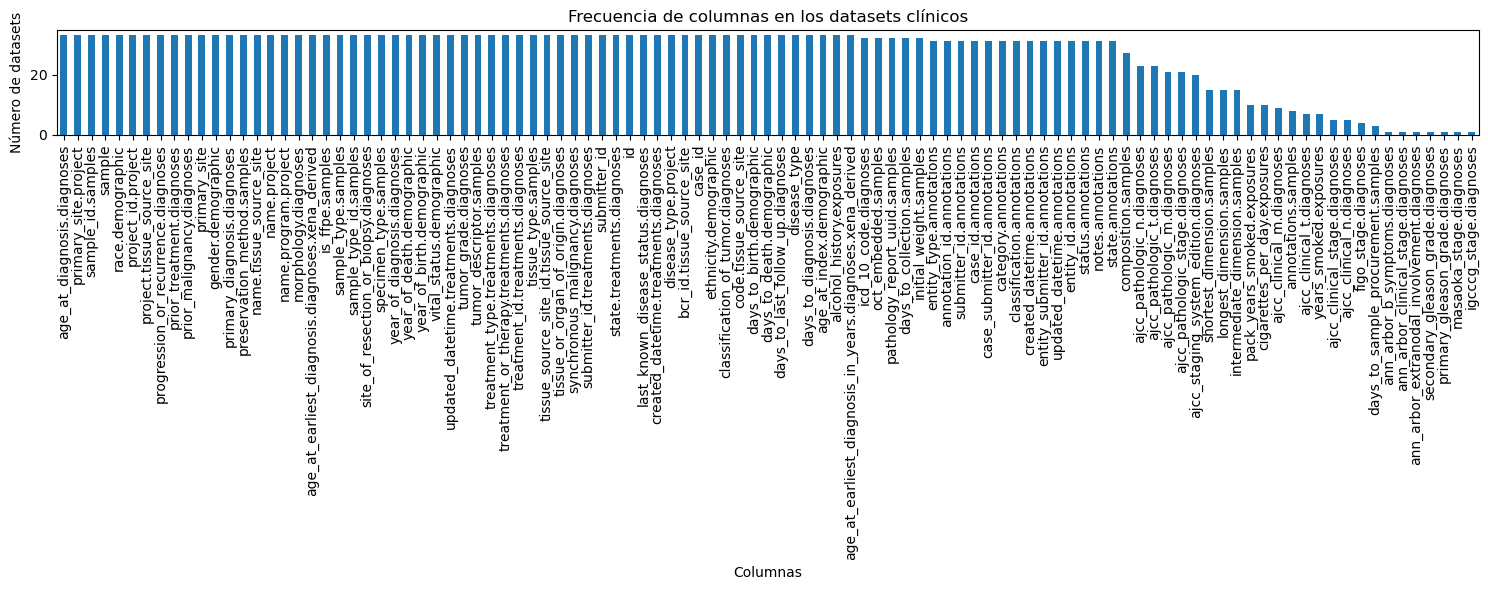

age_at_diagnosis.diagnoses                                   33
primary_site.project                                         33
sample_id.samples                                            33
sample                                                       33
race.demographic                                             33
project_id.project                                           33
project.tissue_source_site                                   33
progression_or_recurrence.diagnoses                          33
prior_treatment.diagnoses                                    33
prior_malignancy.diagnoses                                   33
primary_site                                                 33
gender.demographic                                           33
primary_diagnosis.diagnoses                                  33
preservation_method.samples                                  33
name.tissue_source_site                                      33
name.project                            

In [46]:
visualizar_frecuencia_columnas("../Utilidades/columnas_bool.csv", "Frecuencia de columnas en los datasets clínicos")

### Creamos Data
Con nuevas columnas con el tipo de data correpondiente a ese registro.

In [62]:
import os
import pandas as pd
from collections import defaultdict

# -----------------------------------------------
# 1. Definiciones
# -----------------------------------------------

# Ruta
ruta_datalake = "../DataLake"
ruta_destino = "../DataWarehouse/data.csv"

mapa_cancer = {
    "ACC": "Corteza adrenal", "BLCA": "Vejiga", "BRCA": "Mama", "CESC": "Cuello uterino",
    "CHOL": "Vías biliares", "COAD": "Colon", "DLBC": "Linfoma B difuso", "ESCA": "Esófago",
    "GBM": "Cerebro", "HNSC": "Cabeza y cuello", "KICH": "Riñón", "KIRC": "Riñón",
    "KIRP": "Riñón", "LAML": "Leucemia mieloide aguda", "LGG": "Cerebro", "LIHC": "Hígado",
    "LUAD": "Pulmón", "LUSC": "Pulmón", "MESO": "Mesotelioma", "OV": "Ovario", "PAAD": "Páncreas",
    "PCPG": "Feocromocitoma y paraganglioma", "PRAD": "Próstata", "READ": "Recto", "SARC": "Sarcoma",
    "SKCM": "Melanoma cutáneo", "STAD": "Estómago", "TGCT": "Testículo", "THCA": "Tiroides",
    "THYM": "Timo", "UCEC": "Endometrio", "UCS": "Sarcoma uterino", "UVM": "Melanoma ocular"
}

# -----------------------------------------------
# 2. Leer todos los datasets para ver las columnas
# -----------------------------------------------

datasets = [f for f in os.listdir(ruta_datalake) if f.endswith(".tsv")]

columnas_por_dataset = {}
columnas_totales = set()

for archivo in datasets:
    path = os.path.join(ruta_datalake, archivo)
    try:
        df = pd.read_csv(path, sep="\t", nrows=1)
        columnas = list(df.columns)
        columnas_por_dataset[archivo] = columnas
        columnas_totales.update(columnas)
    except Exception as e:
        print(f"❌ Error en {archivo}: {e}")

# -----------------------------------------------
# 3. Calcular frecuencia de cada columna
# -----------------------------------------------

frecuencia_columna = defaultdict(int)

for columnas in columnas_por_dataset.values():
    for col in columnas:
        frecuencia_columna[col] += 1

# Sacar columnas que aparecen en >= 21 datasets
columnas_validas = [col for col, freq in frecuencia_columna.items() if freq >= 21]

print(f"✅ Se seleccionarán {len(columnas_validas)} columnas que aparecen en al menos 21 datasets.")

# -----------------------------------------------
# 4. Fusionar datasets conservando esas columnas
# -----------------------------------------------

dataframes = []

for archivo in datasets:
    path = os.path.join(ruta_datalake, archivo)
    df = pd.read_csv(path, sep="\t")
    
    # Extraer tipo de cáncer
    tipo_cancer = archivo.split('.')[0].replace('TCGA-', '').replace('_clinical', '').replace('_', '-')
    
    # Añadir columnas
    df['tipo_cancer_TCGA'] = tipo_cancer
    df['tipo_cancer_general'] = mapa_cancer.get(tipo_cancer, "Desconocido")
    
    # Asegurar que todas las columnas estén presentes (NaN donde falte)
    columnas_finales = columnas_validas + ['tipo_cancer_TCGA', 'tipo_cancer_general']
    df = df.reindex(columns=columnas_finales)
    
    dataframes.append(df)

# Concatenar todos
fusionado = pd.concat(dataframes, axis=0, ignore_index=True)

# Mostrar info
print(f"✅ Dataset final: {fusionado.shape[0]} filas y {fusionado.shape[1]} columnas.")

# -----------------------------------------------
# 5. Guardar
# -----------------------------------------------
os.makedirs("../DataWarehouse", exist_ok=True)
fusionado.to_csv(ruta_destino, index=False)

print(f"📄 Guardado en '{ruta_destino}'")


✅ Se seleccionarán 82 columnas que aparecen en al menos 21 datasets.
✅ Dataset final: 13053 filas y 84 columnas.
📄 Guardado en '../DataWarehouse/data.csv'


In [63]:
# Cargar el dataset fusionado (por si no lo tienes ya cargado)
fusionado = pd.read_csv("../DataWarehouse/data.csv")

# Calcular el número de valores nulos por columna
nulos_por_columna = fusionado.isnull().sum()

# Ordenar de mayor a menor
nulos_ordenados = nulos_por_columna.sort_values(ascending=False)

# Mostrar el resultado
print("📊 Número de valores nulos por columna (ordenado de mayor a menor):")
print(nulos_ordenados)

📊 Número de valores nulos por columna (ordenado de mayor a menor):
notes.annotations                                            11712
case_id.annotations                                          11709
category.annotations                                         11709
submitter_id.annotations                                     11709
classification.annotations                                   11709
entity_id.annotations                                        11709
created_datetime.annotations                                 11709
annotation_id.annotations                                    11709
entity_type.annotations                                      11709
state.annotations                                            11709
updated_datetime.annotations                                 11709
status.annotations                                           11709
case_submitter_id.annotations                                11709
entity_submitter_id.annotations                              1

Ya hemos realizado la fusión con las columnas que estaban en más o 21 datasets. Ahora vamos a mirar los valores nulos por columnas, quiero también mirar los valores nulos de algunos registros que he visto que tenían bastante valores nulos.
Primero vamos a eliminar las columnas que tengan muchos valores nulos y que no nos den información útil.
Segundo eliminaremos los registros que tengan mas de 20 varaibles nulas porque si no serían como registros falsos creador por mí.
Tercero comenzaremos analisis de correlación, tipología de variables, etc

In [64]:
columnas_a_eliminar = [
    'notes.annotations',
    'submitter_id.annotations',
    'entity_submitter_id.annotations',
    'entity_id.annotations',
    'created_datetime.annotations',
    'state.annotations',
    'status.annotations',
    'category.annotations',
    'case_submitter_id.annotations',
    'case_id.annotations',
    'classification.annotations',
    'updated_datetime.annotations',
    'annotation_id.annotations',
    'entity_type.annotations',
    'pathology_report_uuid.samples',
    'oct_embedded.samples',
    'initial_weight.samples',
    'days_to_collection.samples'
]

fusionado_limpio = fusionado.drop(columns=[col for col in columnas_a_eliminar if col in fusionado.columns])

print(f"✅ Dataset después de eliminar columnas: {fusionado_limpio.shape[0]} filas y {fusionado_limpio.shape[1]} columnas.")

fusionado_limpio.to_csv("../DataWarehouse/data.csv", index=False)
print("📄 Dataset limpio guardado como 'data.csv'.")

✅ Dataset después de eliminar columnas: 13053 filas y 66 columnas.
📄 Dataset limpio guardado como 'data.csv'.


In [65]:
# Cargar el dataset fusionado (por si no lo tienes ya cargado)
fusionado = pd.read_csv("../DataWarehouse/data.csv")

# Calcular el número de valores nulos por columna
nulos_por_columna = fusionado.isnull().sum()

# Ordenar de mayor a menor
nulos_ordenados = nulos_por_columna.sort_values(ascending=False)

# Mostrar el resultado
print("📊 Número de valores nulos por columna (ordenado de mayor a menor):")
print(nulos_ordenados)

📊 Número de valores nulos por columna (ordenado de mayor a menor):
year_of_death.demographic                                    9790
days_to_death.demographic                                    8780
ajcc_pathologic_m.diagnoses                                  4694
ajcc_pathologic_stage.diagnoses                              4664
ajcc_pathologic_n.diagnoses                                  3696
ajcc_pathologic_t.diagnoses                                  3621
days_to_last_follow_up.diagnoses                             2769
composition.samples                                          2208
icd_10_code.diagnoses                                         414
days_to_diagnosis.diagnoses                                   375
year_of_birth.demographic                                     310
year_of_diagnosis.diagnoses                                   270
age_at_earliest_diagnosis.diagnoses.xena_derived              270
days_to_birth.demographic                                     270
age_at_di

In [66]:
# Contar el número de valores nulos por fila
nulos_por_fila = fusionado.isnull().sum(axis=1)

# Filtrar filas (registros) con más de 60 columnas vacías
registros_con_mas_de_60_nulos = fusionado[nulos_por_fila > 10]

# Mostrar el resultado
print(f"🔍 Hay {registros_con_mas_de_60_nulos.shape[0]} registros con más de 40 columnas vacías.")
display(registros_con_mas_de_60_nulos.head())

🔍 Hay 259 registros con más de 40 columnas vacías.


,sample,id,disease_type,case_id,submitter_id,primary_site,alcohol_history.exposures,race.demographic,gender.demographic,ethnicity.demographic,vital_status.demographic,age_at_index.demographic,days_to_birth.demographic,year_of_birth.demographic,year_of_death.demographic,primary_site.project,project_id.project,disease_type.project,name.project,name.program.project,tissue_source_site_id.tissue_source_site,code.tissue_source_site,name.tissue_source_site,project.tissue_source_site,bcr_id.tissue_source_site,days_to_death.demographic,synchronous_malignancy.diagnoses,ajcc_pathologic_stage.diagnoses,days_to_diagnosis.diagnoses,last_known_disease_status.diagnoses,tissue_or_organ_of_origin.diagnoses,days_to_last_follow_up.diagnoses,age_at_diagnosis.diagnoses,primary_diagnosis.diagnoses,prior_malignancy.diagnoses,year_of_diagnosis.diagnoses,prior_treatment.diagnoses,ajcc_pathologic_t.diagnoses,morphology.diagnoses,ajcc_pathologic_n.diagnoses,ajcc_pathologic_m.diagnoses,classification_of_tumor.diagnoses,icd_10_code.diagnoses,site_of_resection_or_biopsy.diagnoses,tumor_grade.diagnoses,progression_or_recurrence.diagnoses,age_at_earliest_diagnosis.diagnoses.xena_derived,age_at_earliest_diagnosis_in_years.diagnoses.xena_derived,treatment_id.treatments.diagnoses,submitter_id.treatments.diagnoses,treatment_type.treatments.diagnoses,treatment_or_therapy.treatments.diagnoses,created_datetime.treatments.diagnoses,updated_datetime.treatments.diagnoses,state.treatments.diagnoses,sample_type_id.samples,tumor_descriptor.samples,sample_id.samples,sample_type.samples,composition.samples,preservation_method.samples,specimen_type.samples,is_ffpe.samples,tissue_type.samples,tipo_cancer_TCGA,tipo_cancer_general
996,TCGA-17-Z015-01A,9b714a42-62e8-4b33-947e-6c4850725afd,Adenomas and Adenocarcinomas,9b714a42-62e8-4b33-947e-6c4850725afd,TCGA-17-Z015,Bronchus and lung,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bronchus and lung,TCGA-LUAD,"['Cystic, Mucinous and Serous Neoplasms', 'Ade...",Lung Adenocarcinoma,TCGA,28643584-554e-5d24-9312-f6b68cfb6ddd,17,Washington University,Lung adenocarcinoma,IGC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Primary,e5045a61-cbb6-4211-8781-35683700c969,Primary Tumor,Not Reported,Unknown,Solid Tissue,False,Tumor,LUAD,Pulmón
1006,TCGA-17-Z033-01A,a16d7bf7-07b7-4320-969c-fc68dd564a92,Adenomas and Adenocarcinomas,a16d7bf7-07b7-4320-969c-fc68dd564a92,TCGA-17-Z033,Bronchus and lung,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bronchus and lung,TCGA-LUAD,"['Cystic, Mucinous and Serous Neoplasms', 'Ade...",Lung Adenocarcinoma,TCGA,28643584-554e-5d24-9312-f6b68cfb6ddd,17,Washington University,Lung adenocarcinoma,IGC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Primary,3ea88850-f241-41f7-abd8-452109201b36,Primary Tumor,Not Reported,Unknown,Solid Tissue,False,Tumor,LUAD,Pulmón
1011,TCGA-17-Z005-01A,4b5ff30e-65fc-4434-b174-9d699594c658,Adenomas and Adenocarcinomas,4b5ff30e-65fc-4434-b174-9d699594c658,TCGA-17-Z005,Bronchus and lung,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bronchus and lung,TCGA-LUAD,"['Cystic, Mucinous and Serous Neoplasms', 'Ade...",Lung Adenocarcinoma,TCGA,28643584-554e-5d24-9312-f6b68cfb6ddd,17,Washington University,Lung adenocarcinoma,IGC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Primary,703e7197-62b7-4253-98ae-a1b379b5bac3,Primary Tumor,Not Reported,Unknown,Solid Tissue,False,Tumor,LUAD,Pulmón
1028,TCGA-17-Z025-01A,abb86d09-d4ff-41f4-ba22-185dc48347c9,Adenomas and Adenocarcinomas,abb86d09-d4ff-41f4-ba22-185dc48347c9,TCGA-17-Z025,Bronchus and lung,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bronchus and lung,TCGA-LUAD,"['Cystic, Mucinous and Serous Neoplasms', 'Ade...",Lung Adenocarcinoma,TCGA,28643584-554e-5d24-9312-f6b68cfb6ddd,17,Washington University,Lung adenocarcinoma,IGC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [67]:
# Cargar el dataset fusionado
fusionado = pd.read_csv("../DataWarehouse/data.csv")

# Imprimir los valores únicos de la columna 'vital_status.demographic'
valores_unicos = fusionado['vital_status.demographic'].unique()

print("🧩 Valores únicos en 'vital_status.demographic':")
print(valores_unicos)


🧩 Valores únicos en 'vital_status.demographic':
['Alive' 'Dead' nan 'Not Reported']
